## Population density simulations
### Solve A=B ODE and plot population dynamics for given initial conditions from time t0 to t1

Set your parameters

In [12]:
%matplotlib inline
import numpy as np
#      x = 0, T1, 1, A1, 2, S1, 3, S2, 4, T2, 5, A2, 6, C1, 7, C2
#      P = 0, beta_S1, 1, l_S1, 2, K_S1, 3, kb, 4, beta_S2, 5, l_S2, 6,
#      K_S2, 7, beta_lac, 8, l_lac, 9, K_lac, 10, beta_tet, 11, l_tet, 12,
#      K_tet, 13, kc, 14, C_max, 15, dc, 16, xx, 17, I, 18, xx, 19, atc, 20,K_tox
P = np.zeros(24)
P[0] = 6
P[1] = 2e-3
P[2] = 430
P[3] = 30
P[4] = 6
P[5] = 2e-3
P[6] = 190
P[7] = 19.8e-3
P[8] = 1.5e-3
P[9] = 1.4e5
P[10] = 14.4e-3
P[11] = 2.1e-4
P[12] = 13
P[13] = 0.6
P[14] = 5500
P[15] = 0.8
P[16] = np.Inf
P[17] = 1e6
P[18] = np.Inf 
P[19] = 324
P[20] = 1
P[21] = 0.001
P[22] = 1.5
P[23] = 1

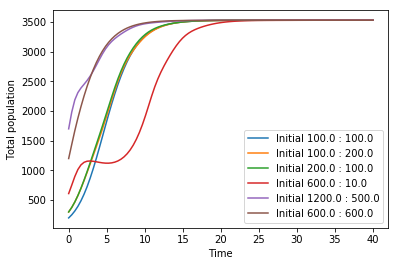

In [13]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt 
from reed_ode import reed_ode
ODE_size = 8

#  Initial seeding (make your own choice)
init_cond = [ [100,100],[100,200],[200,100],[600,10],[1200,500],[600,600]]    
# init_cond = [[100,100],[500,600]]

t0 = 0
t1 = 40
timepoints = np.linspace(t0,t1,100) 

x0=np.zeros(ODE_size)

for i in range(len(init_cond)):
    x0[6] = init_cond[i][0]
    x0[7] = init_cond[i][1]
    outs = solve_ivp(fun = lambda t, x: reed_ode(t, x, P) , t_span = (t0,t1), y0 = x0, t_eval = timepoints)
    t = outs.t
    y = outs.y[:,]
    tot_pop = [i+j for i,j in zip(y[6,:],y[7,:])]
    legend = 'Initial '+ str(x0[6]) + ' : ' + str(x0[7]) 
    plt.plot(timepoints, tot_pop, label = legend)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Total population')
plt.show()



### Solve A=B ODE with disturbance to initial condition after time t1. Plots population dynamics for given initial condition vector

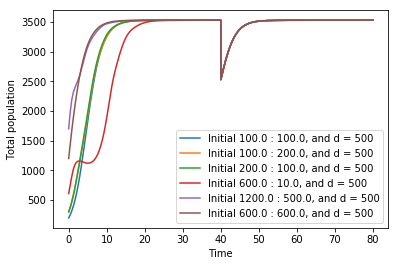

In [14]:
disturb = 500
tn = 80
timepoints2 = np.linspace(t1,tn,100)
for i in range(len(init_cond)):
    x0[6] = init_cond[i][0]
    x0[7] = init_cond[i][1]
    outs = solve_ivp(fun = lambda t, x: reed_ode(t, x, P), t_span = (t0,t1), y0 = x0, t_eval = timepoints)
    t_one = outs.t
    y_one = outs.y[:,]

 # Disturbance to initial condition
    x0n = [i for i in y_one[:,-1]]
    x0n[6] -= disturb
    x0n[7] -= disturb
    outs1 = solve_ivp(fun = lambda t, x: reed_ode(t, x, P), t_span = (t1,tn), y0 = x0n, t_eval = timepoints2)
    tf = outs1.t
    yf = outs1.y[:,]
    x_result = [np.concatenate((i,j)) for i,j in zip(y_one, yf)]
    time_final = np.concatenate((t_one, tf))
    y_result_C1 = list(x_result[6])
    y_result_C2 = list(x_result[7])
#     plt.plot(time_final, y_result_C2)
    # Total population
    legend1 = 'Initial '+ str(x0[6]) + ' : ' + str(x0[7]) + ', and d = ' + str(disturb)
    tot_pop = [i+j for i,j in zip(y_result_C1,y_result_C2)]
    plt.plot(time_final,tot_pop, label = legend1)
    
plt.legend()
plt.xlabel('Time')
plt.ylabel('Total population')
plt.show()


### How does density depend on inducers concentrations?

#### Change inducer parameters in ODE

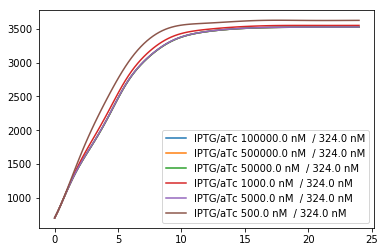

In [15]:

#  Inducer concentrations (make your own choice [IPTG, aTC]) 
# param_var = [[1e6,0],[1e6,0.1],[1e6,0.5],[1e6,1],[1e6,10],[1e6,100]] # Varying aTc with max IPTG    
param_var = [[0,324],[1,324],[5,324],[10,324],[50,324],[100,324]]
param_var = [[1e5,324],[5e5,324],[5e4,324],[1e3,324],[5e3,324],[5e2,324]] # Varying IPTG with max aTc    
# init_cond = [[100,100],[500,600]]

t0 = 0
t1 = 24
timepoints = np.linspace(t0,t1,100) 

x0=np.zeros(ODE_size)
x0[6] = 500
x0[7] = 200
for i in range(len(param_var)):
    P[17] = param_var[i][0]
    P[19] = param_var[i][1]
    outs = solve_ivp(fun = lambda t, x: reed_ode(t, x, P) , t_span = (t0,t1), y0 = x0, t_eval = timepoints)
    t = outs.t
    y = outs.y[:,]
    tot_pop = [i+j for i,j in zip(y[6,:],y[7,:])]
    legend = 'IPTG/aTc '+ str(P[17]) + ' nM ' + ' / ' + str(P[19]) + ' nM'
    plt.plot(timepoints, tot_pop, label = legend)
plt.legend()
plt.show()


### Plot all species in the model

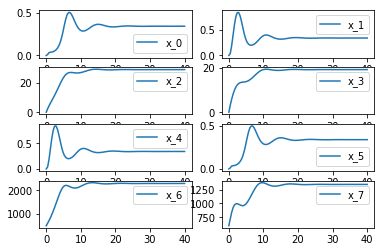

In [16]:

ODE_size = 8

#  Initial seeding (make your own choice)
# init_cond = [ [100,100],[100,200],[200,100],[600,10],[1200,500],[600,600]]    
# init_cond = [[100,100],[500,600]]
init_cond = [[500,600]]

t0 = 0
t1 = 40
timepoints = np.linspace(t0,t1,100) 

x0=np.zeros(ODE_size)

for i in range(len(init_cond)):
    x0[6] = init_cond[i][0]
    x0[7] = init_cond[i][1]
    outs = solve_ivp(fun = lambda t, x: reed_ode(t, x, P) , t_span = (t0,t1), y0 = x0, t_eval = timepoints)
    t = outs.t
    y = outs.y[:,]
#     tot_pop = [i+j for i,j in zip(y[6,:],y[7,:])]
#     legend = 'Initial '+ str(x0[6]) + ' : ' + str(x0[7]) 
    plt.subplot(4,2,1)
    plt.plot(timepoints,y[0,:], label = 'x_0')
    plt.legend()
    plt.subplot(4,2,2)
    plt.plot(timepoints,y[1,:], label = 'x_1')
    plt.legend()
    plt.subplot(4,2,3)
    plt.plot(timepoints,y[2,:], label = 'x_2')
    plt.legend()
    plt.subplot(4,2,4)
    plt.plot(timepoints,y[3,:], label = 'x_3')
    plt.legend()
    plt.subplot(4,2,5)
    plt.plot(timepoints,y[4,:], label = 'x_4')
    plt.legend()
    plt.subplot(4,2,6)
    plt.plot(timepoints,y[5,:], label = 'x_5')
    plt.legend()
    plt.subplot(4,2,7)
    plt.plot(timepoints,y[6,:], label = 'x_6')
    plt.legend()
    plt.subplot(4,2,8)
    plt.plot(timepoints,y[7,:], label = 'x_7')
    plt.legend()
    
#     plt.plot(timepoints, tot_pop, label = legend)

# plt.xlabel('Time')
# plt.ylabel('States')
plt.show()



# label1 = 'Cell 1 : ' + str(x0[6])
# plt.plot(time_final, y_result_C1, label = label1)
# label2 = 'Cell 2 : ' + str(x0[7]) 
# plt.plot(time_final, y_result_C2, label = label2)
# plt.title('Initial conditions : '+ str(init_cond[i]))
# plt.legend()
# plt.show()

# plt.subplot(4,2,1)
# plt.plot(time_final,y_result_C1, label = 'C1')
# plt.subplot(4,2,2)
# plt.plot(time_final,y_result_C2, label = 'C2')

# plt.subplot(4,2,3)
# plt.plot(time_final,x_result[:,0], label = 'T1')
# plt.subplot(4,2,4)
# plt.plot(time_final,x_result[:,1], label = 'A1')
# plt.subplot(4,2,5)
# plt.plot(time_final,x_result[:,2], label = 'S1')
# plt.subplot(4,2,6)
# plt.plot(time_final,x_result[:,3], label = 'S2')
# plt.subplot(4,2,7)
# plt.plot(time_final,x_result[:,4], label = 'T2')
# plt.subplot(4,2,8)
# plt.plot(time_final,x_result[:,5], label = 'A2')
# plt.legend()
# plt.xlabel('Time (in hours) \rightarrow')
# plt.ylabel('Individual cell population (count) \rightarrow')
# plt.show()


# plt.plot(time_final,x_result[:,6], label = 'C1')
# plt.plot(time_final,x_result[:,7], label = 'C2')
# plt.plot(time_final,x_result[:,6] + x_result[:,7], label = 'Total population')
# plt.legend()
# plt.show()